# Metody analizy danych. Lab 7. Biblioteka matplotlib, część 1

## **1. Wprowadzenie**

Na początku warto zapoznać się z nazewnictwem (angielskim) elementów, z których składa się widok wykresu. Poniższa grafika pozwoli na ich identyfikację i możliwość dostosowania wykresu do założeń lub potrzeb danego zadania/problemu.

![Anatomia wykresów](./images/anatomy.png)

In [1]:
import matplotlib.pyplot as plt

## 2. Wybrane typy wykresów

### 2.1 Wykres liniowy

> Dokumentacja: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

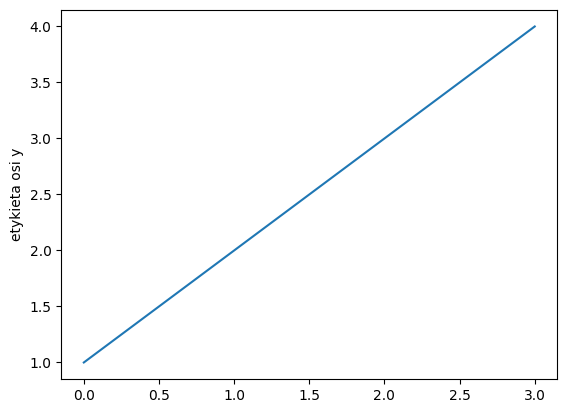

In [12]:
# listnig 1

plt.plot([1, 2, 3, 4])
plt.ylabel('etykieta osi y')
plt.show()

Powyższy kod jest w postaci, która używana jest zazwyczaj w tradycyjnych skryptach języka Python. Jupyter Notebook posiada specjalny backend i metody magiczne, które mają zazwyczaj dodatkowe działanie w notatnikach. Pakiet `matplotlib` również może zostać użyty z wykorzystaniem takiego backendu (więcej tutaj: [https://ipython.readthedocs.io/en/stable/interactive/plotting.html](https://ipython.readthedocs.io/en/stable/interactive/plotting.html).
Zwalnia nas to z obowiązku używania `plt.show()`, ale wypisuje też na wyjściu reprezentację łańcuchową ostatniej linii kodu (obiektu). Można tego uniknąć, przypisując tę instrukcję do zmiennej lub dodając znak `;` na końcu kodu.

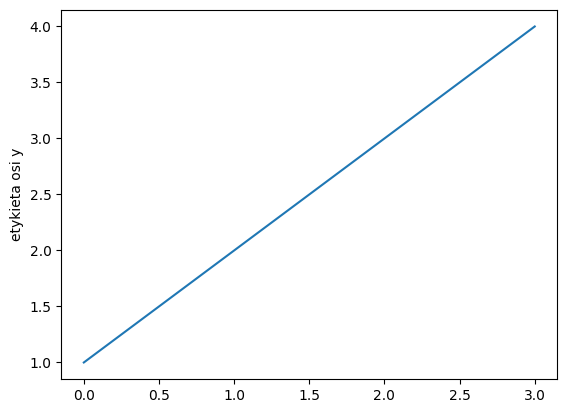

In [13]:
# listing 2

# aktywacja backendu liniowego dla pakietu matplotlib
%matplotlib inline

plt.ylabel('etykieta osi y')
plt.plot([1, 2, 3, 4]);

Wektor przekazanych wartości to oś `Y`, a oś `X` została wygenerowana automatycznie i tutaj dla wartości z wektora `Y` przyjmuje po prostu wartość indeksu z tej listy, czyli dla wartości 1 przyjmuje wartość 0 itd.

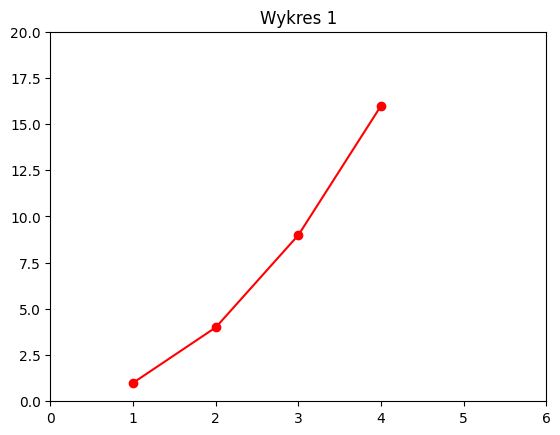

(np.float64(0.0), np.float64(6.0), np.float64(0.0), np.float64(20.0))

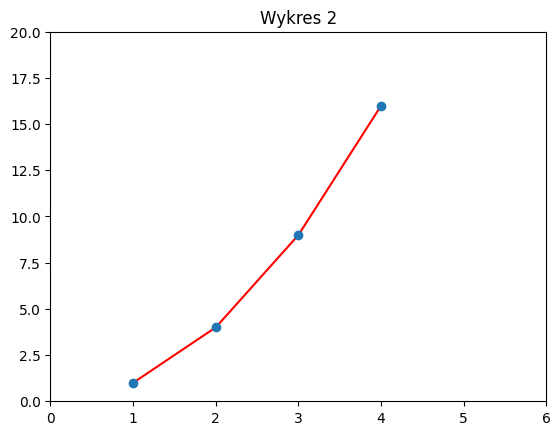

In [14]:
# listing 3

# przekazujemy dwa wektory wartości, najpierw dla wektora x, następnie y
# dodatkowo mamy tutaj przekazany parametr w postaci stringa, który określa styl wykresu
# dla pełnej listy sprawdź dokumentację pod adresem
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro-')
# tutaj określamy listę parametrów w postaci [xmin, xmax, ymin, ymax]
plt.axis([0, 6, 0, 20])
plt.title('Wykres 1')
plt.show()

# możemy też ustawiać różne kolory dla poszczególnych elementów nakładając na siebie dwa wykresy
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'o')
plt.title('Wykres 2')

plt.axis([0, 6, 0, 20])

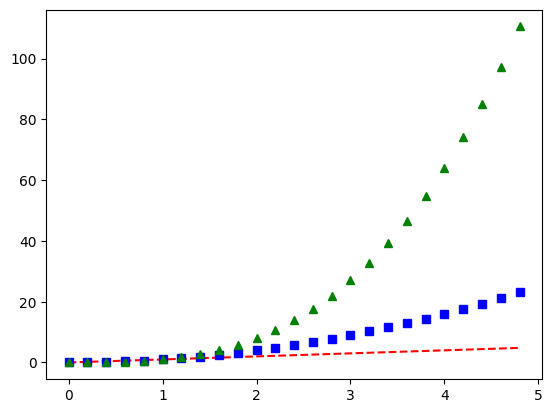

In [15]:
# listing 4
import numpy as np

# bazowy wektor wartości
t = np.arange(0., 5., 0.2)

# za pomocą pojedynczego wywołania funkcji plot() możemy wygenerować wiele wykresów na jednym "płótnie" (ang. canvas)
# każdorazowo podając niezbędne wartości: wartości dla osi x, wartości dla osi y, styl wykresu, ...
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^');

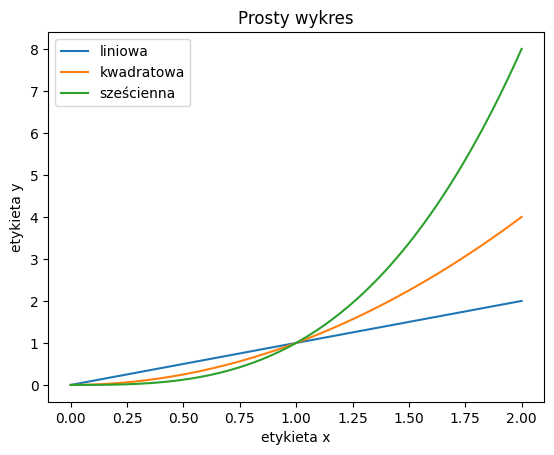

In [19]:
# listing 5
x = np.linspace(0, 2, 100)

# wykresy mogą być też dodawane do płótna definicja po definicji zamiast w pojedynczym wywołaniu funkcji plot()
# tutaj użyty został również parametr label, który określa etykietę danego wykresu w legendzie
plt.plot(x, x, label='liniowa')
plt.plot(x, x**2, label='kwadratowa')
plt.plot(x, x**3, label='sześcienna')

# etykiety osi
plt.xlabel('etykieta x')
plt.ylabel('etykieta y')

# tytuł wykresu
plt.title("Prosty wykres")

# włączamy pokazywanie legendy
plt.legend();

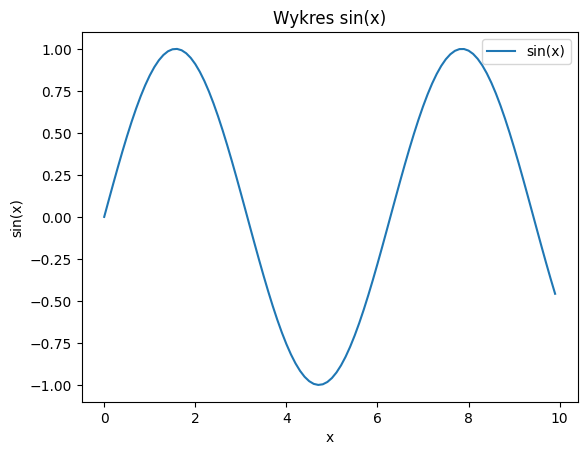

In [20]:
# listing 6

x = np.arange(0, 10, 0.1)
s = np.sin(x)
plt.plot(x, s, label='sin(x)')

# etykiety osi
plt.xlabel('x')
plt.ylabel('sin(x)')

# tytuł wykresu
plt.title("Wykres sin(x)")

# umieszczamy legendę na wykresie
plt.legend();

### 2.2. Wykres punktowy (ang. scatter plot)

> Dokumentacja: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

a=0, b=4.730092742271078, c=34, d=126.79006930101808


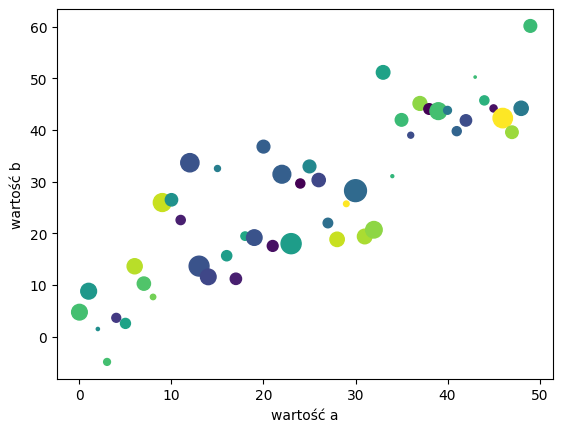

In [27]:
# listing 7

# dane w formie słownika, ale równie dobrze może to być Pandas DataFrame
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# aby w ten sposób przekazać parametry wykresu należy dodać niezbędny parametr data, który zawiera dane dostępne poprzez etykiety
# to oznacza, że 'a' jest równoważne data['a'] itd. Parametr c to skrót od color, tutaj przekazywany w formie wektora
# wartości kolorów dla każdej kolejnej wartości wykresu. Parametr s to scale - określa rozmiar, w tym przypadku punktu, dla
# każdej kolejnej wartości wektora wykresu. Reasumując dla pierwszego punktu wykresu będą brane poniższe wartości
print(f"a={data['a'][0]}, b={data['b'][0]}, c={data['c'][0]}, d={data['d'][0]}")
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('wartość a')
plt.ylabel('wartość b');

### 2.3 Podwykresy

Podwykresy pozwalają na umieszczanie na jednym płótnie wielu wykresów zorganizowanych w formie gridu. Podajemy wymiary gridu, czyli liczbę wierszy oraz liczbę kolumn. Służy to tego funkcja subplot, która przyjmuje 3 argumenty (`nrows, ncols, index`). Odpowiednio jest to ilość wierszy gridu, ilość kolumn oraz indeks definiowanego właśnie wykresu (indeksy rozpoczynają się od 1 i kończą na `nrows*ncols`).

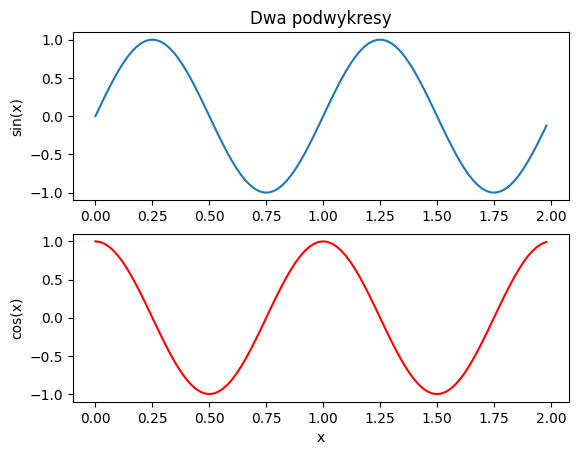

In [29]:
# listing 8

x1 = np.arange(0.0, 2.0, 0.02)
x2 = np.arange(0.0, 2.0, 0.02)

y1 = np.sin(2 * np.pi * x1)
y2 = np.cos(2 * np.pi * x2)


plt.subplot(2, 1, 1)
plt.plot(x1, y1, '-')
plt.title('Dwa podwykresy')
plt.ylabel('sin(x)')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r-')
plt.xlabel('x')
plt.ylabel('cos(x)');

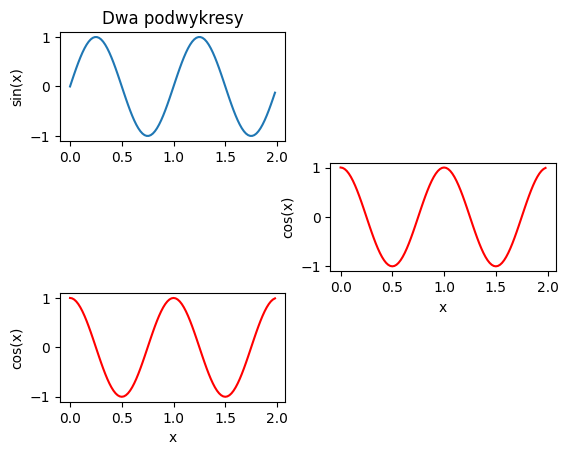

In [31]:
# listing 9
# inny przykład podwykresów

x1 = np.arange(0.0, 2.0, 0.02)
x2 = np.arange(0.0, 2.0, 0.02)
y1 = np.sin(2 * np.pi * x1)
y2 = np.cos(2 * np.pi * x2)

# oznacza, że mamy tutaj do czynienia z gridem 3x2 (3 wiersze, 2 kolumny) i definiujemy wykres o indeksie 1
plt.subplot(3, 2, 1)
plt.plot(x1, y1, '-')
plt.title('Dwa podwykresy')
plt.ylabel('sin(x)')

# możemy również pominąć przecinki, tu wykres o indeksie 4, więc pominęliśmy 2 oraz 3
plt.subplot(324)
plt.plot(x2, y2, 'r-')
plt.xlabel('x')
plt.ylabel('cos(x)')

plt.subplot(3, 2, 5)
plt.plot(x2, y2, 'r-')
plt.xlabel('x')
plt.ylabel('cos(x)');

### 2.4 Wykres słupkowy

> Dokumentacja: 
> * pionowy: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
> * poziomy: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

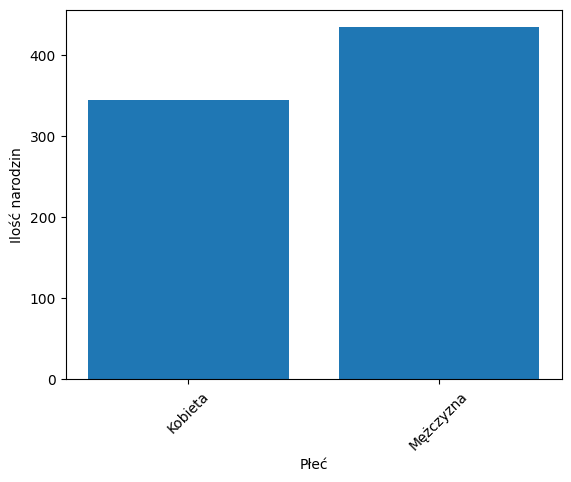

In [33]:
# listing 10
# poniższy listing przedstawia prosty przykład wykresu słupkowego.

etykiety = ['Kobieta', 'Mężczyzna']
wartosci = [345, 435]

plt.bar(etykiety, wartosci)
# możemy również zmienić np. kierunek tekstu etykiet słupków, żeby zaoszczędzić trochę miejsca
plt.xticks(rotation=45)
plt.ylabel('Ilość narodzin')
plt.xlabel('Płeć');

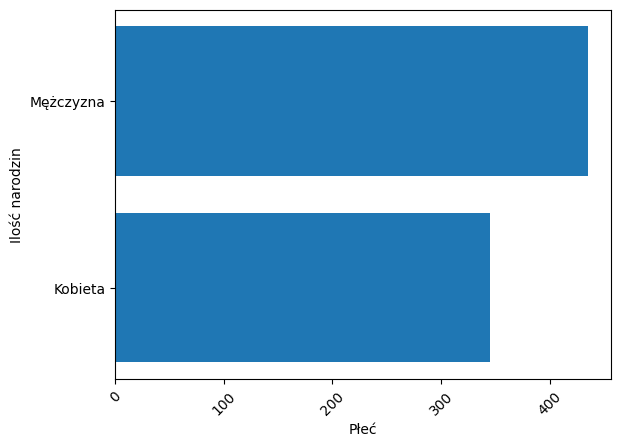

In [38]:
# to samo, ale w postaci wykresu słupkowego poziomego

etykiety = ['Kobieta', 'Mężczyzna']
wartosci = [345, 435]

plt.barh(etykiety, wartosci)
# możemy również zmienić np. kierunek tekstu etykiet słupków, żeby zaoszczędzić trochę miejsca
plt.xticks(rotation=45)
plt.ylabel('Ilość narodzin')
plt.xlabel('Płeć');

### 2.5 Wykres typu histogram

> Dokumentacja: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

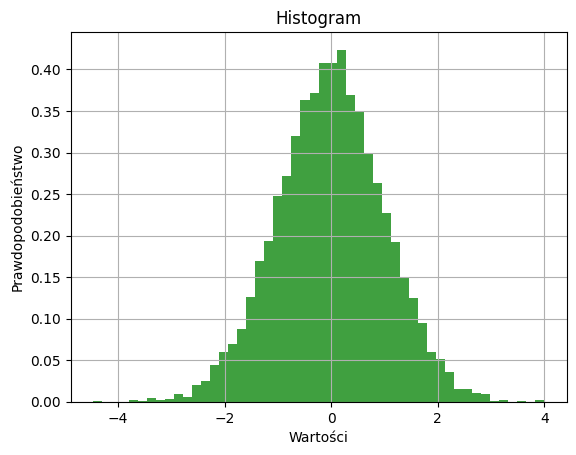

In [34]:
# listing 11
# generujemy próbkę wartości z rozkładu normalnego
x = np.random.randn(10000)

# bins oznacza ilość "koszy" czyli słupków, do których mają wpadać wartości z wektora x
# facekolor oznacza kolor słupków
# alpha to stopień przezroczystości wykresu
# density oznacza czy suma ilości zostanie znormalizowana do rozkładu prawdopodobieństwa (czyli przedział 0, 1)
plt.hist(x, bins=50, facecolor='g', alpha=0.75, density=True)

plt.xlabel('Wartości')
plt.ylabel('Prawdopodobieństwo')
plt.title('Histogram')
# wyświatlanie siatki
plt.grid(True)

### 2.6 Wykres kołowy

> Dokumentacja: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

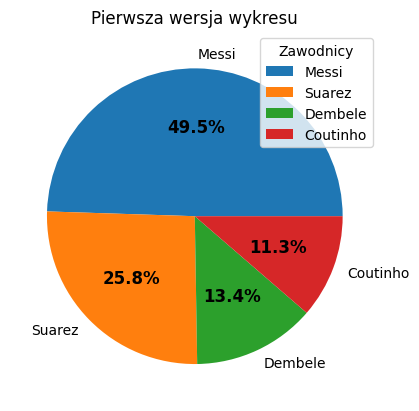

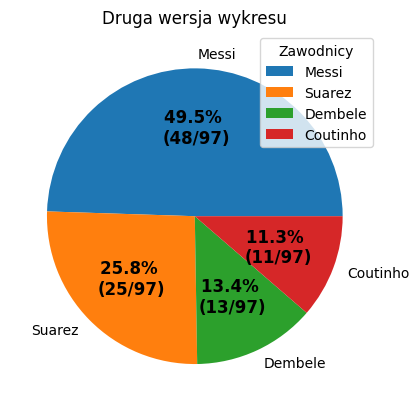

In [37]:
# listing 12

zawodnicy = ['Messi', 'Suarez', 'Dembele', 'Coutinho']
bramki = [48, 25, 13, 11]


# pierwsza wersja wykresu
wedges, texts, autotexts = plt.pie(bramki, labels=zawodnicy,
                                   autopct=lambda pct: "{:.1f}%".format(pct), textprops=dict(color="black"))
plt.setp(autotexts, size=12, weight="bold")
plt.title("Pierwsza wersja wykresu")
plt.legend(title='Zawodnicy')
plt.show()

# druga wersja wykresu
def prepare_label(pct, br):
    absolute = int(np.ceil(pct / 100. * np.sum(br)))
    return "{:.1f}% \n({}/{})".format(pct, absolute, sum(bramki))


wedges, texts, autotexts = plt.pie(bramki, labels=zawodnicy,
                                   autopct=lambda pct: prepare_label(pct, bramki), textprops=dict(color="black"))
plt.setp(autotexts, size=12, weight="bold")
plt.title("Druga wersja wykresu")

# więcej o parametrach legendy wykresów znajdziesz pod adresem
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(title='Zawodnicy', loc='best');

### 3. Przykład wykresu z ramki pandas

Biblioteka matplotlib jest biblioteką niskopoziomową w porównaniu do bibliotek, które zostaną przedstawione na kolejnych zajęciach (seaborn, bokeh, plotly) i wymaga nieco więcej pracy w procesie przygotowania i selekcji danych do wykresu. Przykład zostanie zaprezentowany na bazie danych ze zbioru `zamowienia.csv`.

In [39]:
# wczytujemy dane
import pandas as pd

df_zam = pd.read_csv(r'https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_06/data/zamowienia.csv', sep=';')
df_zam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kraj             799 non-null    object 
 1   Sprzedawca       799 non-null    object 
 2   Data zamowienia  799 non-null    object 
 3   idZamowienia     799 non-null    int64  
 4   Utarg            799 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 31.3+ KB


<Axes: >

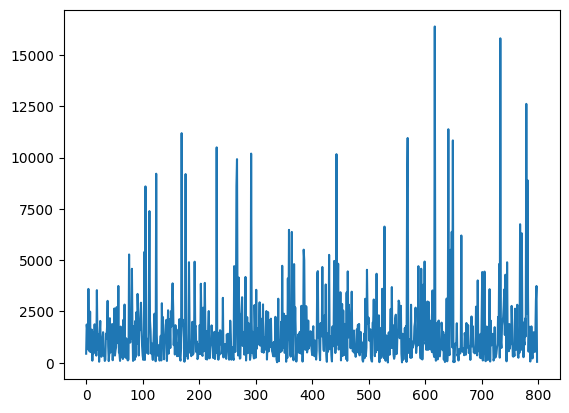

In [40]:
# zobaczmy bardzo prosty wykres dla kolumny Utarg
df_zam['Utarg'].plot()

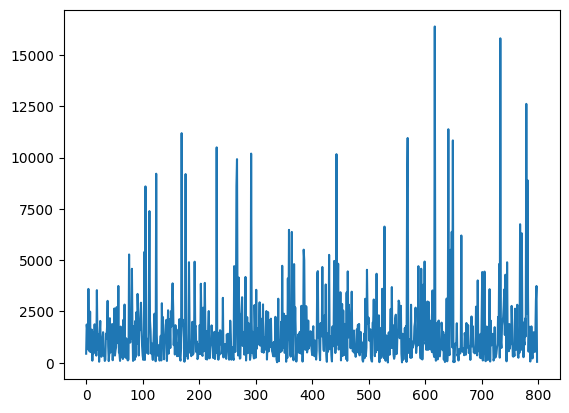

In [42]:
# lub tak
plt.plot(df_zam['Utarg'])

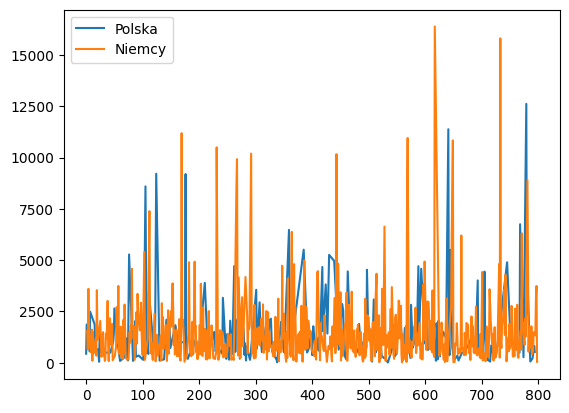

In [45]:
# rozważmy teraz przykład, w którym chcielibyśmy wyświetlić dwie serie danych (dwie linie na jednym wykresie) dla każdego kraju z osobna
plt.plot(df_zam[df_zam['Kraj'] == 'Polska']['Utarg'])
plt.plot(df_zam[df_zam['Kraj'] == 'Niemcy']['Utarg'])
plt.legend(['Polska','Niemcy'])

In [47]:
# teraz chcielibyśmy zrobić to samo, ale dla każdego roku z osobna (i kraju) licząc sumę utargu
# najwygodniej będzie przygotować dane w postaci ramki zgrupowanej z agregacją

# krok 1 - zamienimy kolumnę Data zamowienia na tym datetime, co znacznie ułatwi operowanie na składowych daty (i np. grupowanie po roku, miesiącu, itp.)
df_zam['Data zamowienia'] = pd.to_datetime(df_zam['Data zamowienia'])
df_zam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Kraj             799 non-null    object        
 1   Sprzedawca       799 non-null    object        
 2   Data zamowienia  799 non-null    datetime64[ns]
 3   idZamowienia     799 non-null    int64         
 4   Utarg            799 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 31.3+ KB


In [51]:
# krok 2 - grupujemy dane i liczymu sumę dla każdej grupy (czyli kraju i roku)
df_zam_sum_by_year = df_zam.groupby([df_zam['Data zamowienia'].dt.year, 'Kraj']).agg({'Utarg': ['sum']})
df_zam_sum_by_year

Utarg
                              sum
Data zamowienia Kraj             
2003            Niemcy  136002.99
                Polska   57313.55
2004            Niemcy  452347.15
                Polska  156843.61
2005            Niemcy  306646.35
                Polska  119173.75

<Axes: xlabel='Data zamowienia,Kraj'>

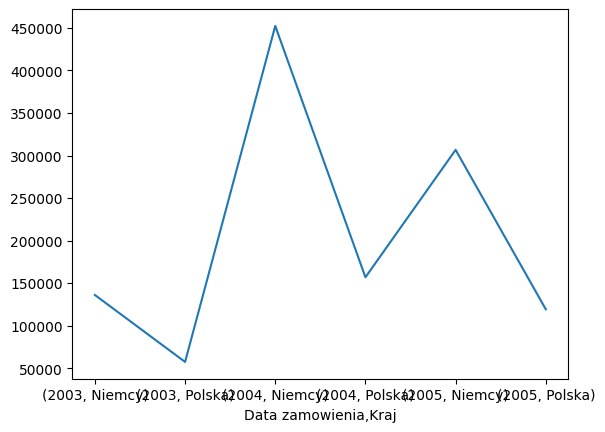

In [54]:
# krok 3 - wykres
# sprubójmy po prostu wyrysować wykres dla kolumny ('Utarg','sum') (bo mamy tu multiindeks)
df_zam_sum_by_year[('Utarg', 'sum')].plot()

# nie wygląda to do końca tak jakbyśmy chcieli (chcemy dwie oddzielne serie dla kraju, a na osi x rok)

In [58]:
# spróbujmy więc zrobić to oddzielnie
# jakie mamy indeksy w ramce?
df_zam_sum_by_year.index

MultiIndex([(2003, 'Niemcy'),
            (2003, 'Polska'),
            (2004, 'Niemcy'),
            (2004, 'Polska'),
            (2005, 'Niemcy'),
            (2005, 'Polska')],
           names=['Data zamowienia', 'Kraj'])

In [62]:
# pojedynczy punkt danych
df_zam_sum_by_year.loc[2003,'Polska']

Utarg  sum    57313.55
Name: (2003, Polska), dtype: float64

In [82]:
# wydobycie danych z takiej ramki jest dość kłopotliwe
# może nam pomóc reset indeksu
df_zam_sum_by_year_2 = df_zam_sum_by_year.reset_index()
df_zam_sum_by_year_2

,Data zamowienia,Kraj,Utarg
,,,sum
0,2003,Niemcy,136002.99
1,2003,Polska,57313.55
2,2004,Niemcy,452347.15
3,2004,Polska,156843.61
4,2005,Niemcy,306646.35
5,2005,Polska,119173.75


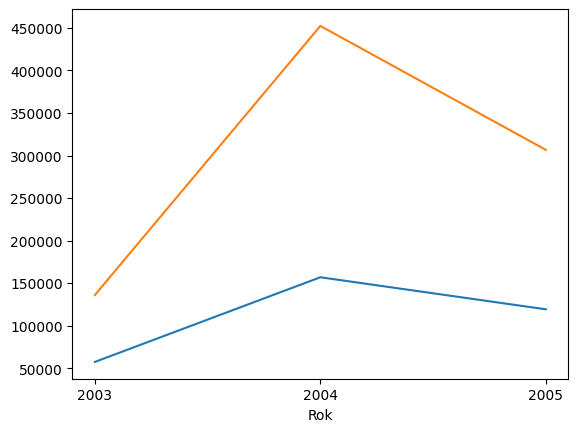

In [102]:
# teraz nieco łatwiej
x = df_zam_sum_by_year_2['Data zamowienia'].unique()
plt.xticks(df_zam_sum_by_year_2['Data zamowienia'].unique())
plt.xlabel('Rok')
plt.plot(x, df_zam_sum_by_year_2[df_zam_sum_by_year_2['Kraj'] == 'Polska'][('Utarg','sum')])
plt.plot(x, df_zam_sum_by_year_2[df_zam_sum_by_year_2['Kraj'] == 'Niemcy'][('Utarg','sum')])

In [63]:
# aby przygotować zgrupowaną ramkę danych tak, aby jeszcze łatwiej było dostać się do serii danych wykorzystamy funkcję unstack()
df_zam_sum_by_year.unstack()

Utarg           
                       sum           
Kraj                Niemcy     Polska
Data zamowienia                      
2003             136002.99   57313.55
2004             452347.15  156843.61
2005             306646.35  119173.75

<Axes: xlabel='Data zamowienia'>

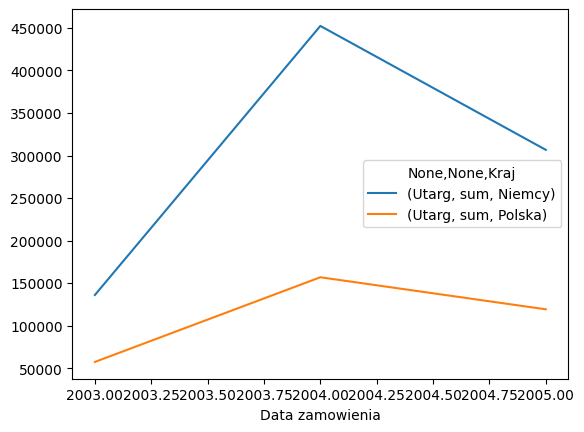

In [72]:
df_zam_sum_by_year_unstacked = df_zam_sum_by_year.unstack()
df_zam_sum_by_year_unstacked.plot()

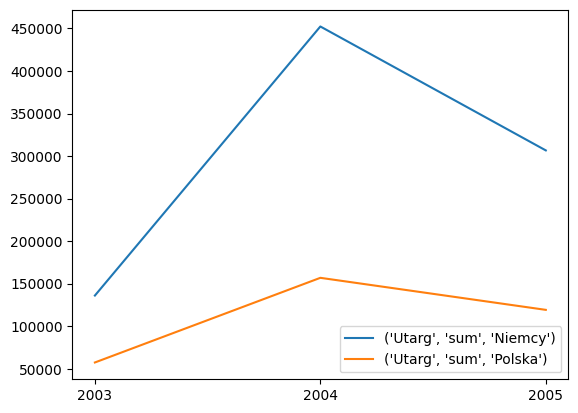

In [79]:
# poprawiamy nieco oś x
plt.xticks(df_zam_sum_by_year_unstacked.index)
plt.plot(df_zam_sum_by_year_unstacked)
plt.legend(df_zam_sum_by_year_unstacked.columns)

### 4. Zadania

**Zadanie 1**

Przygotuj i wyświetl wykres liniowy funkcji f(x) = 1/x dla x ϵ [1, 20]. Dodaj etykietę do linii wykresu i wyświetl legendę. Dodaj odpowiednie etykiety do osi wykresu (‘x’, ’f(x)’) oraz ustaw zakres dla obu osi na (0, 1) oraz (1, długość wektora x).

**Zadanie 2**

Korzystając ze zbioru danych [zamowienia.csv](./data/zamowienia.csv) przygotuj i wyświetl dane w postaci wykresu liniowego z sumą zamówień dla każdego sprzedawcy z Polski w roku 2004 grupując po miesiącach (wzoruj się przykładzie z pkt. 3 tego labu). Każdy wykres to linia dla danego sprzedawcy, a oś x reprezentuje kolejne miesiące roku 2004. Pamiętaj o tym, że można iterować przez zgrupowaną ramkę danych pandas.

**Zadanie 3**

Korzystając z biblioteki pandas wczytaj zbiór danych z [narodzinami dzieci](./data/imiona.xlsx) przygotuj poniższe wykresy:
* 3.1 - wykres słupkowy przedstawiający ilość narodzonych dziewczynek i chłopców w całym okresie.
* 3.2 - wykres liniowy, gdzie będą dwie linie, jedna dla ilości urodzonych kobiet, druga dla mężczyzn dla każdego roku z osobna. Czyli y to ilość narodzonych kobiet lub mężczyzn (dwie linie), x to rok.
* 3.3 - wykres słupkowy przedstawiający sumę urodzonych dzieci w każdym roku.

Dodaj do wykresów stosowne etykiety. Poustawiaj różne kolory dla wykresów.

**Zadanie 4**

Korzystając ze zbioru danych Iris (https://archive.ics.uci.edu/ml/datasets/iris) wygeneruj wykres punktowy, gdzie wektor x to wartość `sepal length` a y to `sepal width`, dodaj paletę kolorów `c` na przykładzie listingu 7, a parametr `s` niech będzie wartością bezwzględną z różnicy wartości poszczególnych elementów wektorów x oraz y. Wykorzystaj bibliotekę pandas do przechowania datasetu.

**Zadanie 5**

Korzystając z pliku [zamowienia.csv](./data/zamowienia.csv), policz sumy zamówień dla każdego sprzedawcy i wyświetl wykres kołowy z procentowym udziałem każdego sprzedawcy w ogólnej sumie zamówień. Poszukaj w Internecie jak dodać cień do takiego wykresu i jak działa atrybut `explode` tego wykresu. Wyświetl wykres podstawowy, z cieniem oraz z jednym elementem z aktywnym atrybutem `explode`.

**Zadanie 6**

Korzystając z galerii matplotlib i [przykładu](https://matplotlib.org/stable/gallery/misc/packed_bubbles.html#sphx-glr-gallery-misc-packed-bubbles-py) postaraj się umieścić analogicznie 10 najbardziej ludnych krajów na świecie w roku 2017 korzystając z danych w pliku [ludność](./data/ludnosc.xlsx).